## Examen Final 2020-2


In [2]:
import sys
sys.path.insert(0, "..")

from algorithms.network_flows import print_vector, Edge, get_edges, build_matrix
from algorithms.util2 import print_model
from algorithms.simplex_algorithms import *
import numpy as np

np.set_printoptions(suppress=True, linewidth=np.nan)


### Problema 1

\begin{align*}
    -\max \quad 3x_1& - x_2 - x_3 \\
    \text{s.t.} \quad\quad x_1& -2x_2 + x_3 \le 11\\
                -4x_1& + x_2 + 2x_3 \ge 3\\
                2x_1& - x_3 = -1\\
                x_1&,x_2, x_3\ge 0
\end{align*}

#### a) Use el método gráfico para resolver el modelo (P)

**Solución**

Reemplazando la ultima ecuacion $x_3 = 2x_1 + 1$ qued 
\begin{align*}
    -\max \quad x_1& - x_2 - 1 \\
    \text{s.t.} \quad\quad 3x_1& -2x_2 \le 10\\
                x_2&   \ge 1\\
                x_1&,x_2 \ge 0
\end{align*}

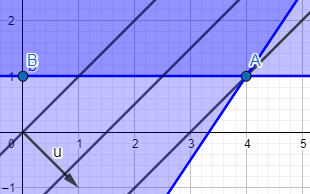

In [2]:
cost = lambda x1, x2: x1 - x2 - 1
x_opt = (4, 1)
cost(*x_opt)


2

La solución es el punto $A=(4, 1, 9)$, con costo 2, dado que se multiplicó por $-1$ para la maximización el costo en la minimización es $-2$ 

#### b) Muestre que la región factible (P) es no acotada

Sea la semi-recta $\mathcal L = \left\{ \mathbf p \in \mathbb R^3 | \mathbf  p = \begin{bmatrix}0\\ 1+t\\ 1\end{bmatrix}, t\ge 0\right\}$, satisface todas las restricciones. Por lo tanto el modelo es no acotado.

**Solución**

$0 - 2(1-t) + 1 = -1-2t\ge 11, -4(0)+(1+t) + 2(1) =3+t\ge 3, 2(0)-1 = -1, t\ge0$

#### c) Muestre que (P), extendida con las variables de holgura $x_4$ y $x_5$ para la primera y segunda restricción, respectivamente, tiene una única solución óptima y es no degenerada

**Solución**

Multiplicando por $-1$ la tercera restricción y agregando las variables de holgura $x_4, x_5$ y $u_1, u_2$ 

In [3]:
A = np.array([[1, -2, 1, 1, 0., 0, 0],
              [-4, 1, 2, 0, -1, 1, 0],
              [-2, 0, 1, 0, 0., 0, 1]])

b = [11, 3, 1.0]

c = np.array([3, -1, -1, 0, 0.0])

c_artificial = [0, 0, 0, 0, 0, -1.0, -1]

basic_var = [3, 5, 6]
artificial_var = [5, 6]
tableau = build_tableau(A, b, c_artificial)
tableau = two_phases(tableau, c, basic_var, artificial_var)


x_B = [4, 6, 7]
[[ 0.  0.  0.  0.  0. -1. -1.  0.]
 [ 1. -2.  1.  1.  0.  0.  0. 11.]
 [-4.  1.  2.  0. -1.  1.  0.  3.]
 [-2.  0.  1.  0.  0.  0.  1.  1.]]
Cost corrected
x_B = [4, 6, 7]
[[-6.  1.  3.  0. -1.  0.  0.  4.]
 [ 1. -2.  1.  1.  0.  0.  0. 11.]
 [-4.  1.  2.  0. -1.  1.  0.  3.]
 [-2.  0.  1.  0.  0.  0.  1.  1.]]
Start phase One
x_B = [4, 6, 3]
[[ 0.  1.  0.  0. -1.  0. -3.  1.]
 [ 3. -2.  0.  1.  0.  0. -1. 10.]
 [ 0.  1.  0.  0. -1.  1. -2.  1.]
 [-2.  0.  1.  0.  0.  0.  1.  1.]]
x_B = [4, 2, 3]
[[ 0.  0.  0.  0.  0. -1. -1.  0.]
 [ 3.  0.  0.  1. -2.  2. -5. 12.]
 [ 0.  1.  0.  0. -1.  1. -2.  1.]
 [-2.  0.  1.  0.  0.  0.  1.  1.]]
Delete artificial variables and create a new tableau [5, 6]
Start phase two, put original cost
x_B = [4, 2, 3]
[[ 3. -1. -1.  0.  0.  0.]
 [ 3.  0.  0.  1. -2. 12.]
 [ 0.  1.  0.  0. -1.  1.]
 [-2.  0.  1.  0.  0.  1.]]
Cost corrected
vertex = [ 0.  1.  1. 12.  0.], x_B = [4, 2, 3]
[[ 1.  0.  0.  0. -1.  2.]
 [ 3.  0.  0.  1. -2. 12.]
 [ 0

La solución óptima es $x^*=(4, 1, 9, 0, 0)$, es no degenerada pues sus variables básicas son distintas de 0.

#### d) Determine el dual de (P), y los **signos** de los precios sombras de las tres restricciones.
**Solución**

Modelo dual
\begin{align*}
\max 11y_1& + 3y_2 + y_3\\
\text{s.t.} \quad  y_1& - 4y_2 - 2y_3\le -3\\
                        -2y_1& + y_2 \le 1\\
                        y_1& + 2y_2 + y_3\le 1\\
                        y_1&\le 0, y_2\ge 0, y_3 \text{ free} 
\end{align*}

Signo de los precio sombra

El modelo tiene una solución óptima no degenerada así que los precios sombra de cualquier restricción tecnológica son iguales al valor correspondiente de la variable de decisión dual.

Para delta $\delta = 1$
- 1ra restricción, $z^*(\delta)=2.33333$ (incrementa) lo que implica que el precio sombra es no negativo.
- 2da restricción, $z^*(\delta)=1.66666$ (disminuye) lo que implica que el precio sombra es no positivo.
- 3ra restricción, $z^*(\delta)=1$ (disminuye) lo que implica que el precio sombra es no positivo.


#### e) Use una matriz básica primal óptimal, para determinar una solución dual optimal de (P).
**Solución**

$$y^* = {(B^{-1})}^Tc_{BI}$$

$x_{BI}=[x_0, x_1, x_2]$

In [4]:
A = np.array(A)
B = A[:, basic_var]
y_sol = np.linalg.inv(B).T @ c[basic_var]
print("y* =", y_sol)

y* = [ 0.33333333 -0.33333333 -0.66666667]


#### f) Reemplace la tercera restricción de (P) por dos desigualdades; llame al nuevo modelo (PS). Muestre que la solución optimal de (PS) es degenerada y única. Determine todas las matrices básicas óptimas de (PS), y la correspondiente matriz básica dual complementaria.

**Solución**

\begin{align*}
    -\max \quad 3x_1& - x_2 - x_3 \\
    \text{s.t.} \quad\quad x_1& -2x_2 + x_3 \le 11\\
                -4x_1& + x_2 + 2x_3 \ge 3\\
                -2x_1& + x_3 \le 1\\
                -2x_1& + x_3 \ge 1\\
                x_1&,x_2, x_3\ge 0
\end{align*}

In [5]:
A = np.array([[1, -2, 1., 1, 0., 0, 0.],
              [4, -1, -2, 0, 1, 0, 0.],
              [-2, 0, 1., 0, 0., 1, 0.],
              [2, 0, -1., 0, 0., 0, 1]])

b = np.array([11, -3, 1.0, -1])

c = np.array([3, -1, -1, 0, 0, 0, 0.0])

var = set(range(A.shape[1]))

basic_var = [3, 4, 5, 6]
tableau = build_tableau(A, b, c)
tableau = simplex(tableau, basic_var)


vertex = [ 0.  0.  0. 11. -3.  1. -1.], x_B = [4, 5, 6, 7]
[[ 3. -1. -1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  1.  0.  0.  0. 11.]
 [ 4. -1. -2.  0.  1.  0.  0. -3.]
 [-2.  0.  1.  0.  0.  1.  0.  1.]
 [ 2.  0. -1.  0.  0.  0.  1. -1.]]
vertex = [-0.75  0.    0.   11.75  0.   -0.5   0.5 ], x_B = [4, 1, 6, 7]
[[ 0.   -0.25  0.5   0.   -0.75  0.    0.    2.25]
 [ 0.   -1.75  1.5   1.   -0.25  0.    0.   11.75]
 [ 1.   -0.25 -0.5   0.    0.25  0.    0.   -0.75]
 [ 0.   -0.5   0.    0.    0.5   1.    0.   -0.5 ]
 [ 0.    0.5   0.    0.   -0.5   0.    1.    0.5 ]]
vertex = [ 3.16666667  0.          7.83333333  0.          0.         -0.5         0.5       ], x_B = [3, 1, 6, 7]
[[ 0.          0.33333333  0.         -0.33333333 -0.66666667  0.          0.         -1.66666667]
 [ 0.         -1.16666667  1.          0.66666667 -0.16666667  0.          0.          7.83333333]
 [ 1.         -0.83333333  0.          0.33333333  0.16666667  0.          0.          3.16666667]
 [ 0.         -0.5      

Dado que $x_6=0$, es una solución degenerada, y como los costos no básicos con estrictamente negativos la solución es única.

In [6]:
tableau2 = np.copy(tableau)
tableau2

array([[ 0.        ,  0.        ,  0.        , -0.33333333, -0.33333333,  0.        , -0.66666667, -2.        ],
       [ 0.        ,  0.        ,  1.        ,  0.66666667, -1.33333333,  0.        ,  2.33333333,  9.        ],
       [ 1.        ,  0.        ,  0.        ,  0.33333333, -0.66666667,  0.        ,  1.66666667,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -1.        ,  0.        ,  2.        ,  1.        ]])

In [7]:
basic_index_1 = [2, 0, 5, 1]
basic_index_2 = [2, 0, 6, 1]

En la fila 4, está la variable básica degenerada $x_5$ el cual se le cambiará por $x_6$ (iniciando desde $i=0$), pues en esa columna que ya de por si es negativa y óptima hay un único valor positivo que cumple con el test de mínimo ratio.

In [8]:
pivoting(tableau2, 3, 6)
tableau2


array([[ 0.        ,  0.        ,  0.        , -0.33333333, -0.33333333,  0.66666667,  0.        , -2.        ],
       [ 0.        ,  0.        ,  1.        ,  0.66666667, -1.33333333, -2.33333333,  0.        ,  9.        ],
       [ 1.        ,  0.        ,  0.        ,  0.33333333, -0.66666667, -1.66666667,  0.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -1.        , -2.        ,  0.        ,  1.        ]])

Matriz básica dual complementaria (Chapter 2 page 70).

In [9]:
basic_index_comp_1 = [0, 1, 3]
basic_index_comp_2 = [0, 1, 2]


Theorem 4.5.2

\begin{align*}
    \hat{\mathbf{x}}_{BI} &= B^{-1}\mathbf{b} = \mathbf{b}_{NI^c} - \overline{N}^T{\left(\overline{B}^{-1}\right)}^T\mathbf{b}_{BI^c}\\

    \hat{\mathbf{y}}_{{BI}^c} &=  {\left(\overline{B}^{-1}\right)}^T\mathbf{c} = N^T{\left(B^{-1}\right)}^T\mathbf{c}_{BI} -  \mathbf{c}_{NI}
\end{align*}

In [10]:
A_T = np.array([[1., 4., -2., 2, -1, 0, 0],
                [-2., -1, 0., 0, 0, -1, 0],
                [1., -2, 1., -1, 0, 0, -1]])

b_T = np.array([11, -3, 1.0, -1, 0, 0, 0])

c_T = np.array([3, -1, -1.0])

Bc_1 = A_T[:, basic_index_comp_1]
Bc_2 = A_T[:, basic_index_comp_2]

non_basic_index_1 = list(var - set(basic_index_1))
non_basic_index_2 = list(var - set(basic_index_2))

N_1 = A[:, non_basic_index_1]
N_2 = A[:, non_basic_index_2]

B_1 = A[:, basic_index_1]
B_2 = A[:, basic_index_2]


Método 1: utilizando el modelo dual (obs: no coincide)

In [11]:
y_sol1 = np.zeros(A_T.shape[1])
y_sol2 = np.zeros(A_T.shape[1])

y_sol1[basic_index_comp_1] = np.linalg.inv(Bc_1).T @ c_T
y_sol2[basic_index_comp_2] = np.linalg.inv(Bc_2).T @ c_T

print(f"Solución 1\ny* = {y_sol1}\nz* = {np.dot(y_sol1, b_T)}")
print(f"Solución 2\ny* = {y_sol2}\nz* = {np.dot(y_sol2, b_T)}")


Solución 1
y* = [ 0. -1.  0.  1.  0.  0.  0.]
z* = 2.000000000000001
Solución 2
y* = [3.33333333 3.         5.66666667 0.         0.         0.         0.        ]
z* = 33.33333333333335


#### g) Muestre que el modelo dual de (PS) tiene soluciones optimales múltiples.


Método 2: utilizando el modelo primal (obs: coincide)
 

In [12]:
y_sol1 = np.zeros(A.shape[1])
y_sol2 = np.zeros(A.shape[1])

y_sol1[basic_index_comp_1] = N_1.T @ (np.linalg.inv(B_1)).T @ c[basic_index_1] - c[non_basic_index_1]
y_sol2[basic_index_comp_2] = N_2.T @ (np.linalg.inv(B_2)).T @ c[basic_index_2] - c[non_basic_index_2]

print(f"Solución 1\ny* = {y_sol1}\nz* = {np.dot(y_sol1, b_T)}")
print(f"Solución 2\ny* = {y_sol2}\nz* = {np.dot(y_sol2, b_T)}")


Solución 1
y* = [0.33333333 0.33333333 0.         0.66666667 0.         0.         0.        ]
z* = 2.0
Solución 2
y* = [ 0.33333333  0.33333333 -0.66666667  0.          0.          0.          0.        ]
z* = 2.0


#### h) Dibuje el grafo de adyacencia del modelo (PS).


In [13]:
from itertools import combinations
basic_index_feasible = []
for comb in list(combinations(list(var), 4)):
    B = A[:, comb]
    if np.linalg.matrix_rank(B) == 4:
        B_inv = np.linalg.inv(B)
        if (B_inv @ b >= 0.0).all():
            basic_index_feasible.append(list(comb))
            print(comb)


(0, 1, 2, 5)
(0, 1, 2, 6)
(1, 2, 3, 5)
(1, 2, 3, 6)


In [14]:
for i, indexes in enumerate(basic_index_feasible):
    print(indexes)

[0, 1, 2, 5]
[0, 1, 2, 6]
[1, 2, 3, 5]
[1, 2, 3, 6]


In [15]:
for i, indexes in enumerate(basic_index_feasible):
    basic_index_temp = indexes.copy()
    tableau = build_tableau(A, b, c)
    correct_all_tableau(tableau, basic_index_temp)
    print(f"Start simplex process {i + 1}...")
    tableau = simplex(tableau, basic_index_temp)
    print(basic_index_temp)
    print(f"End simplex process {i + 1}")


All tableau corrected
Start simplex process 1...
vertex = [4. 1. 9. 0. 0. 0. 0.], x_B = [1, 2, 3, 6]
[[ 0.          0.          0.         -0.33333333 -0.33333333  0.         -0.66666667 -2.        ]
 [ 1.          0.          0.          0.33333333 -0.66666667  0.          1.66666667  4.        ]
 [ 0.          1.          0.          0.         -1.          0.          2.          1.        ]
 [ 0.          0.          1.          0.66666667 -1.33333333  0.          2.33333333  9.        ]
 [ 0.          0.          0.          0.          0.          1.          1.          0.        ]]
[0, 1, 2, 5]
End simplex process 1
All tableau corrected
Start simplex process 2...
vertex = [4. 1. 9. 0. 0. 0. 0.], x_B = [1, 2, 3, 7]
[[ 0.          0.          0.         -0.33333333 -0.33333333  0.66666667  0.         -2.        ]
 [ 1.          0.          0.          0.33333333 -0.66666667 -1.66666667  0.          4.        ]
 [ 0.          1.          0.          0.         -1.         -2.    

In [16]:
tableau2 = build_tableau(A, b, c)
basic_var = [1, 2, 3, 5]
correct_all_tableau(tableau2, basic_var)
print(tableau2)
pivoting(tableau2, 4, 6)
print(tableau2)


All tableau corrected
[[ 1.  0.  0.  0. -1.  0.  1.  2.]
 [ 0.  1.  0.  0. -1.  0.  2.  1.]
 [-2.  0.  1.  0.  0.  0. -1.  1.]
 [ 3.  0.  0.  1. -2.  0.  5. 12.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.]]
[[ 1.  0.  0.  0. -1. -1.  0.  2.]
 [ 0.  1.  0.  0. -1. -2.  0.  1.]
 [-2.  0.  1.  0.  0.  1.  0.  1.]
 [ 3.  0.  0.  1. -2. -5.  0. 12.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.]]


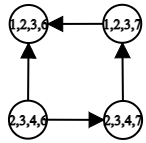